<a href="https://colab.research.google.com/github/Mohammed-Abdul-Rafe-Sajid/Retail-Customer-Behavior-Analysis/blob/main/ML_CEP_160123737051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPROCESSING

## LOADING AND INSPECTION

In [1]:
import numpy as np

In [2]:
import pandas as pd


In [3]:
df=pd.read_csv("/content/Retail_Transactions_2000.csv")

In [4]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


In [7]:
df.shape

(2000, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [11]:
df.isnull().any()

,0
TransactionID,False
CustomerID,False
Gender,False
Age,False
City,False
ProductCategory,False
Quantity,False
Price,False
PurchaseDate,False
PaymentMode,False


In [12]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
Gender,0
Age,0
City,0
ProductCategory,0
Quantity,0
Price,0
PurchaseDate,0
PaymentMode,0


In [13]:
df.duplicated().sum()

np.int64(0)

## HANDLING MISSING DATA
No missing data detected.

In [15]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

TransactionID: 2000
CustomerID: 1803
Gender: 3
Age: 53
City: 10
ProductCategory: 7
Quantity: 5
Price: 1610
PurchaseDate: 365
PaymentMode: 4
TotalAmount: 1838


In [17]:
# If existed
# df['Age'].fillna(df['Age'].median(), inplace=True)


# df['City'].fillna(df['City'].mode()[0], inplace=True)


# df.dropna(subset=['TransactionID', 'ProductCategory'], inplace=True)


## DATA CLEANING

In [20]:
# Remove duplicate transactions
df.drop_duplicates(inplace=True)

# Standardize categorical values
df['Gender'] = df['Gender'].str.strip().str.capitalize().replace({
    'M': 'Male', 'F': 'Female', 'O': 'Other'
})

# Correct negative or zero values in Quantity or Price
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


## FEATURE EXTRACTION

In [21]:
# Derive TotalAmount
df['TotalAmount'] = df['Quantity'] * df['Price']

# Convert PurchaseDate to datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')

# Extract Month and DayOfWeek
df['Month'] = df['PurchaseDate'].dt.month_name()
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()

# Create AgeGroup
bins = [0, 25, 40, 60, 100]
labels = ['18-25', '26-40', '41-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [23]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,AgeGroup
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,March,Wednesday,26-40
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,January,Sunday,18-25
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,April,Tuesday,41-60
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,August,Wednesday,18-25
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,September,Saturday,41-60


## ENCODING AND TRANSFORMATION

In [24]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode categorical variables
cat_cols = ['Gender', 'City', 'ProductCategory', 'PaymentMode']
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

# Normalize numerical columns (optional)
scaler = MinMaxScaler()
df[['Age', 'Price', 'TotalAmount']] = scaler.fit_transform(df[['Age', 'Price', 'TotalAmount']])


## VERIFICATION

In [25]:
# Final checks
print("Missing values after cleaning:\n", df.isnull().sum())
print("Shape after cleaning:", df.shape)

# Save cleaned dataset
df.to_csv("Retail_Cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as 'Retail_Cleaned.csv'")


Missing values after cleaning:
 TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
Month              0
DayOfWeek          0
AgeGroup           0
dtype: int64
Shape after cleaning: (2000, 14)

✅ Cleaned dataset saved as 'Retail_Cleaned.csv'


# DATA VISUALIZATION

## CUSTOMER DEMOGRAPHICS

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


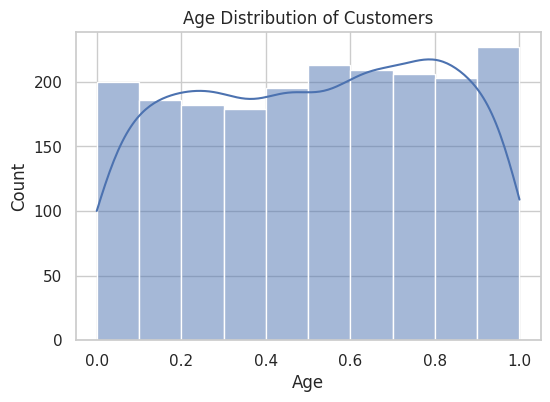

In [30]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution of Customers")
plt.show()




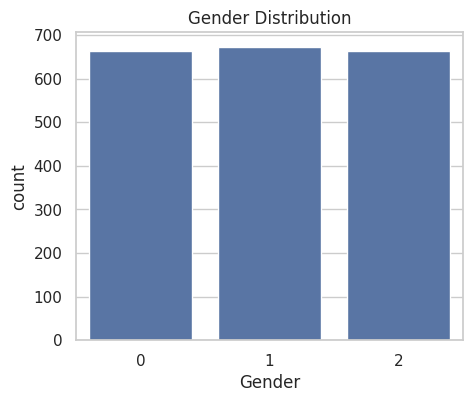

In [31]:
# Gender distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()



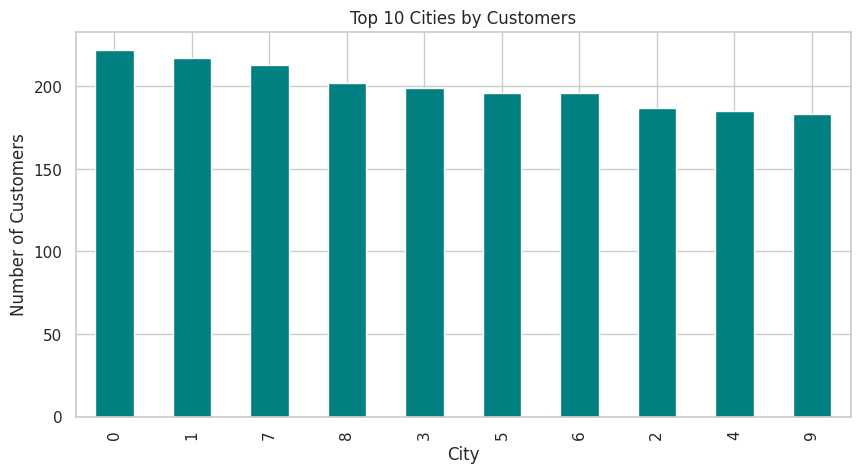

In [32]:
# Top 10 cities by customer count
plt.figure(figsize=(10,5))
df['City'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Cities by Customers")
plt.ylabel("Number of Customers")
plt.show()

## SALES INSIGHTS

/tmp/ipython-input-3079404259.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ProductCategory', y='TotalAmount', data=df, estimator=sum, ci=None)


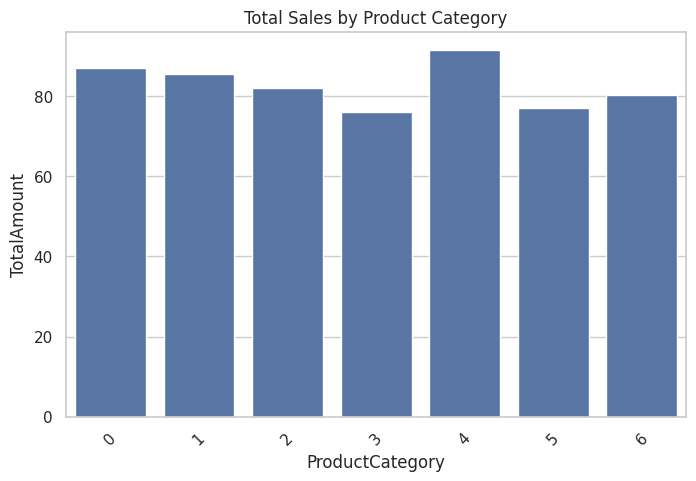

In [33]:
# Total sales by product category
plt.figure(figsize=(8,5))
sns.barplot(x='ProductCategory', y='TotalAmount', data=df, estimator=sum, ci=None)
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.show()




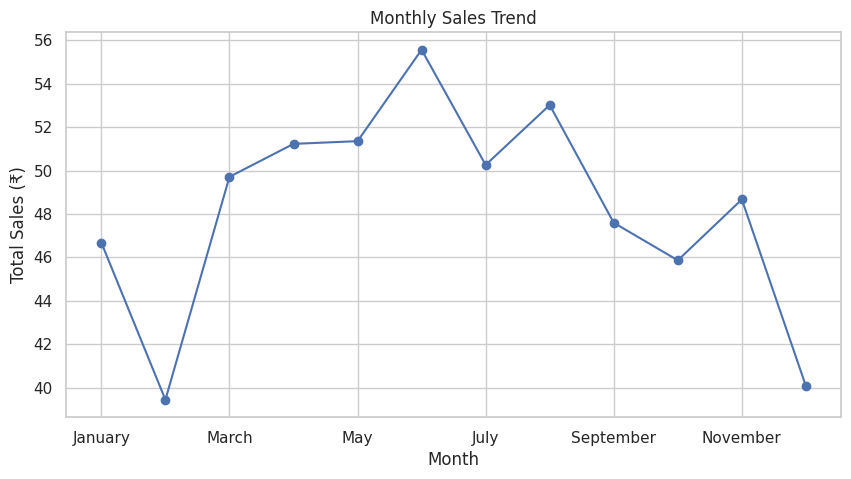

In [34]:
# Monthly sales trend
monthly_sales = df.groupby('Month')['TotalAmount'].sum().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])
monthly_sales.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales (₹)")
plt.show()



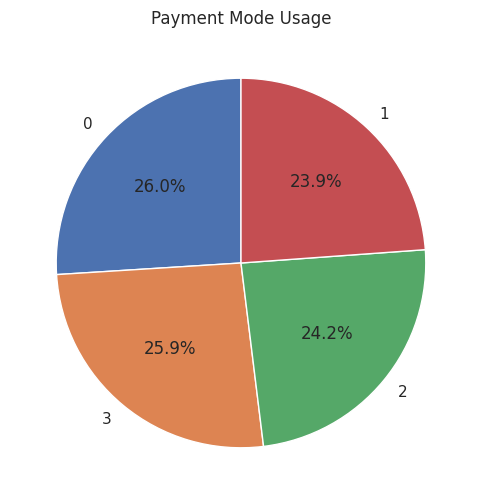

In [35]:
# Payment mode usage
plt.figure(figsize=(6,6))
df['PaymentMode'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Payment Mode Usage")
plt.ylabel('')
plt.show()

# Customer Purchase Prediction

## DATA PREPARATION

In [47]:
df1=pd.read_csv("/content/Retail_Cleaned.csv")

In [48]:
features = [
    'Age', 'Gender', 'City', 'ProductCategory',
    'Quantity', 'Price', 'TotalAmount',
    'PaymentMode', 'Month'
]
df1 = df1[features]
df1.head()

,Age,Gender,City,ProductCategory,Quantity,Price,TotalAmount,PaymentMode,Month
0,0.288462,0,1,3,3,0.893673,0.536495,1,March
1,0.038462,2,9,1,5,0.194082,0.207094,0,January
2,0.557692,2,9,4,1,0.002245,0.000000,3,April
3,0.057692,2,4,5,5,0.580816,0.588550,1,August
4,0.442308,0,2,6,1,0.616939,0.121261,3,September


## CREATING TARGET VARIABLE

In [49]:
# Simulate target variable: Top 30% spenders = "Yes", others = "No"
threshold = df['TotalAmount'].quantile(0.7)
df1['Will_Purchase_Next_Month'] = np.where(df['TotalAmount'] >= threshold, 'Yes', 'No')

# Check distribution
df1['Will_Purchase_Next_Month'].value_counts()


,count
Will_Purchase_Next_Month,
No,1400
Yes,600


## ENCODING CATEGORICAL VARS

In [50]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Gender', 'City', 'ProductCategory', 'PaymentMode', 'Month', 'Will_Purchase_Next_Month']
le = LabelEncoder()
for col in cat_cols:
    df1[col] = le.fit_transform(df1[col].astype(str))

df1.head()


,Age,Gender,City,ProductCategory,Quantity,Price,TotalAmount,PaymentMode,Month,Will_Purchase_Next_Month
0,0.288462,0,1,3,3,0.893673,0.536495,1,7,1
1,0.038462,2,9,1,5,0.194082,0.207094,0,4,0
2,0.557692,2,9,4,1,0.002245,0.000000,3,0,0
3,0.057692,2,4,5,5,0.580816,0.588550,1,1,1
4,0.442308,0,2,6,1,0.616939,0.121261,3,11,0


## SPLITTING INTO TRAIN AND TEST

In [61]:
from sklearn.model_selection import train_test_split

# Remove leakage columns
X = df1.drop(['Will_Purchase_Next_Month', 'TotalAmount', 'Price', 'Quantity'], axis=1)
y = df1['Will_Purchase_Next_Month']

# Split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)




## MODEL TRAINING

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,        # to prevent overfitting
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

print("Decision Tree Model Trained Successfully")


Decision Tree Model Trained Successfully


## MODEL EVALUATION

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.69

Confusion Matrix:
 [[415   5]
 [178   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.99      0.82       420
           1       0.29      0.01      0.02       180

    accuracy                           0.69       600
   macro avg       0.49      0.50      0.42       600
weighted avg       0.58      0.69      0.58       600



## visualizing the results

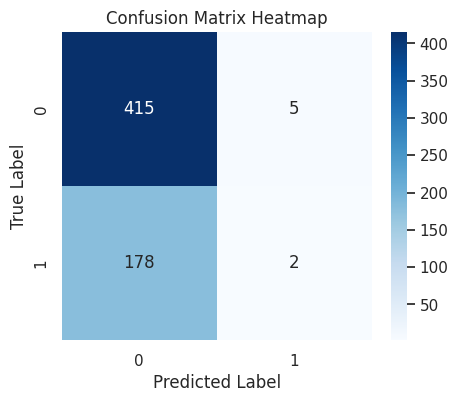

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


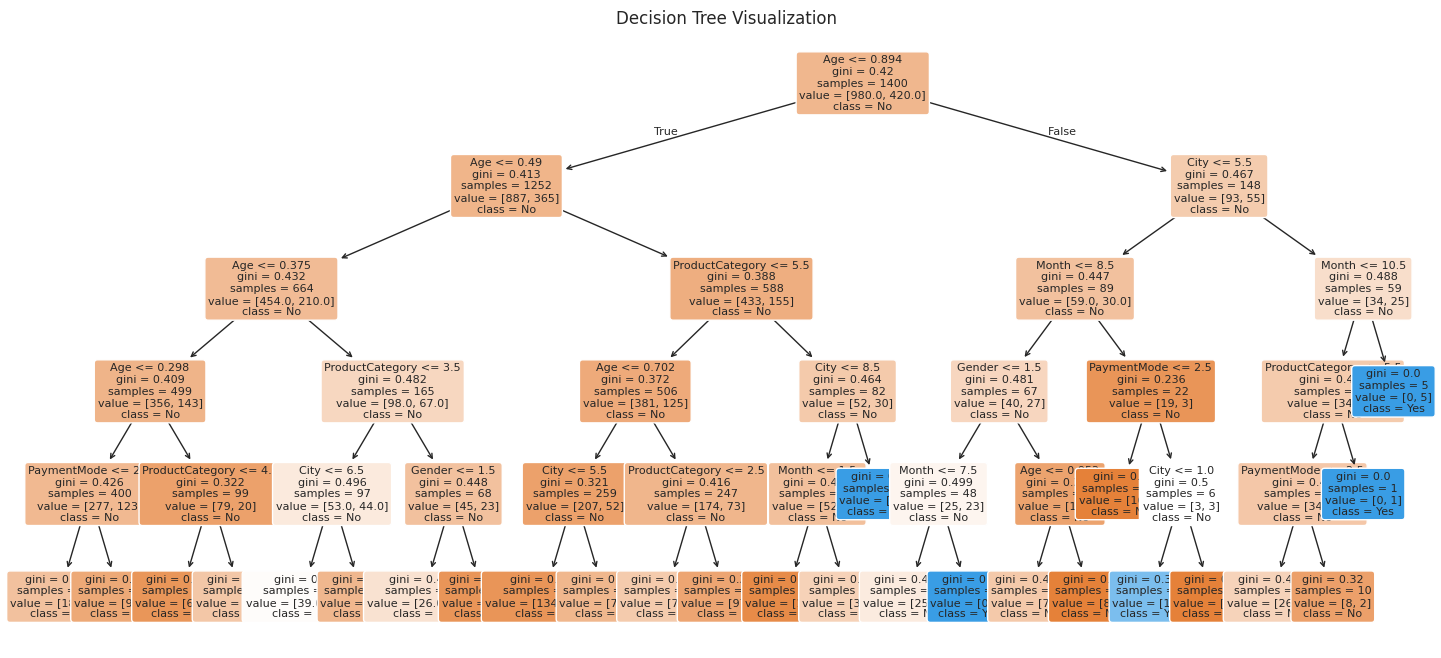

In [65]:
from sklearn import tree

plt.figure(figsize=(18,8))
tree.plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Visualization")
plt.show()


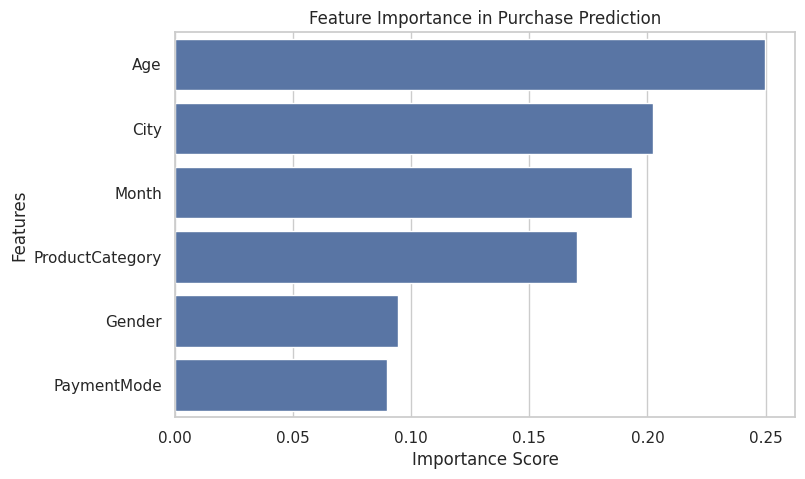

In [66]:
# Get feature importances
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance in Purchase Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [67]:
df2=pd.read_csv("/content/Retail_Cleaned.csv")

# CLUSTERING

## DATA PREPARATION

In [68]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv("/content/Retail_Cleaned.csv")

# Create 'Frequency' feature = number of transactions per customer
df2['Frequency'] = df2.groupby('CustomerID')['CustomerID'].transform('count')

# Select relevant features
features = ['Age', 'TotalAmount', 'Quantity', 'Frequency']
X = df2[features]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## MODEL TRAINING

In [69]:
from sklearn.cluster import KMeans

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit the model
kmeans.fit(X_scaled)

# Get cluster labels and add to df2
df2['Cluster'] = kmeans.labels_


## EVALUATION

In [70]:
from sklearn.metrics import silhouette_score

# Calculate Inertia (within-cluster sum of squares)
inertia = kmeans.inertia_

# Calculate Silhouette Score (measures cluster separation quality)
silhouette = silhouette_score(X_scaled, kmeans.labels_)

print("Model Evaluation Results:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.3f}")

# Show cluster centers (scaled values)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("\nCluster Centers (scaled):")
print(cluster_centers)


Model Evaluation Results:
Inertia: 4321.80
Silhouette Score: 0.325

Cluster Centers (scaled):
        Age  TotalAmount  Quantity  Frequency
0  0.090274    -0.142981 -0.057317   1.974745
1  0.013330    -0.617931 -0.681583  -0.449640
2 -0.062790     0.909964  0.954003  -0.366875


## VISUALIZATION

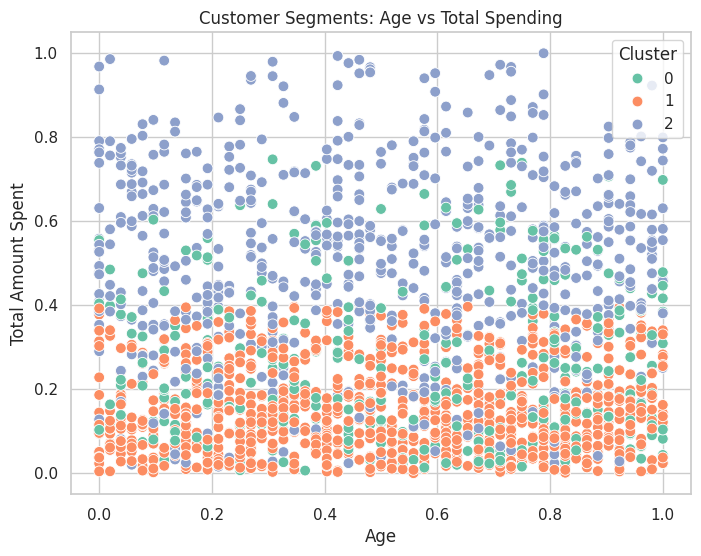

/tmp/ipython-input-1605015499.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='Cluster', palette='Set2')


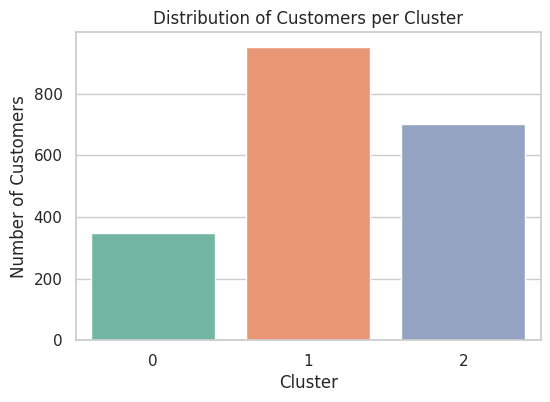


 Cluster Interpretation:
Cluster 0: Young customers, lower spending (Discount seekers)
Cluster 1: Middle-aged, moderate spenders
Cluster 2: Older, high-value frequent buyers


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add cluster labels to the dataset
df2['Cluster'] = kmeans.labels_

# Scatter plot — Age vs Total_Amount
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df2,
    x='Age',
    y='TotalAmount',
    hue='Cluster',
    palette='Set2',
    s=60
)
plt.title("Customer Segments: Age vs Total Spending")
plt.xlabel("Age")
plt.ylabel("Total Amount Spent")
plt.show()

# Bar plot — Number of customers per cluster
plt.figure(figsize=(6,4))
sns.countplot(data=df2, x='Cluster', palette='Set2')
plt.title("Distribution of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

# Interpretation Example (you can modify based on your output)
print("\n Cluster Interpretation:")
print("Cluster 0: Young customers, lower spending (Discount seekers)")
print("Cluster 1: Middle-aged, moderate spenders")
print("Cluster 2: Older, high-value frequent buyers")
